Importing the Libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [71]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [72]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [73]:
print(y)
# y is a 1-dimension array and may cannot be used for scaling 
# fit_transform() of standard scalar expects a 2D array 
# How to do this use reshape(rows,colums)=> Creates 2-D array as well
# transform it

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [74]:
y = y.reshape(len(y),1)


In [75]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [76]:
# There is explicit relation between the dependant variable and the features
# No compensation of coefficient muliplying with features
# IN SVR THERE IS IMPLICIT RELATION BETWEEN DV AND FEATURE

# Feature scaling has to be done to both X and y, coz it is an implicit
# relationship.  

# WHEN NOT USE FEATURE SCALING 
# when independant variable has undergone one hot encoding 
# when dependant variable is binary

In [77]:
# We have to create two objects of standard scalar, one for dependant variable
# and one for independant variable, Because the mean and standard deviation
# used in feature scaling of X may not be the same for y
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [78]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [79]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Training the SVR model on the whole dataset

In [80]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Gausian radial base function
regressor.fit(X,y)


C:\Users\Johnal\anaconda3\envs\Johnal\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [81]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualising the SVR results

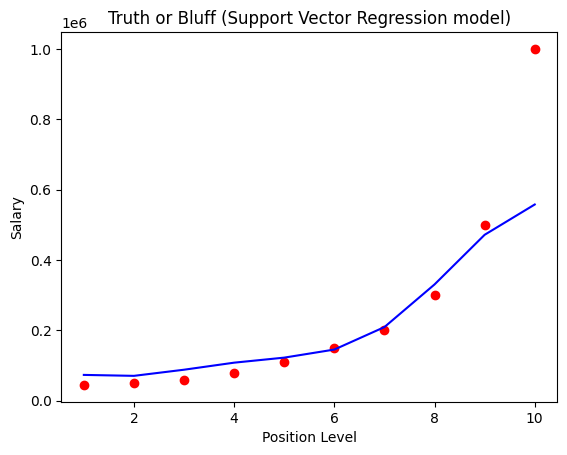

In [83]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR results( for higher resolution and smoother curve)

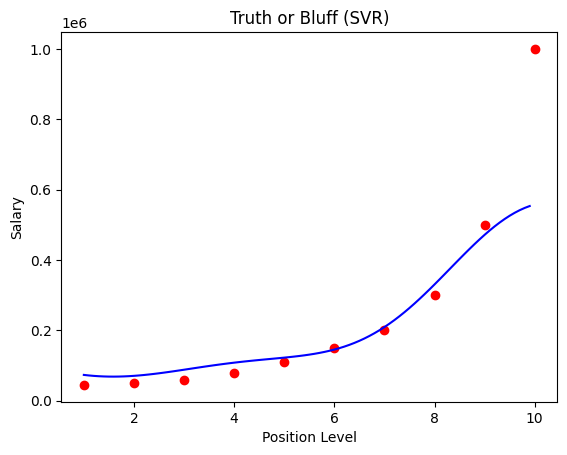

In [85]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()